## Calculating the chi-square for a distribution and a histogram.

We will do it two ways. With and without normalized histograms

In [1]:
%pylab inline --no-import-all
from scipy.stats import norm #will use this for plotting

Populating the interactive namespace from numpy and matplotlib


### make some data from a N(0,1) distribution

In [2]:
n_bins = 50
x = norm.rvs(size=10000)

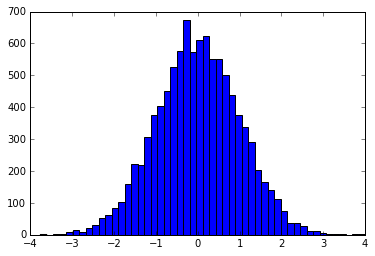

In [3]:
counts, bins, patches = plt.hist(x, bins=n_bins,normed=False)

## Get Bin centers

Get the location for the bin centers. Here I do it step by step so you can see what is going on.

In [4]:
# all bins edges
bins

array([-3.76115359, -3.60599679, -3.45084   , -3.2956832 , -3.14052641,
       -2.98536962, -2.83021282, -2.67505603, -2.51989923, -2.36474244,
       -2.20958564, -2.05442885, -1.89927205, -1.74411526, -1.58895846,
       -1.43380167, -1.27864488, -1.12348808, -0.96833129, -0.81317449,
       -0.6580177 , -0.5028609 , -0.34770411, -0.19254731, -0.03739052,
        0.11776628,  0.27292307,  0.42807987,  0.58323666,  0.73839345,
        0.89355025,  1.04870704,  1.20386384,  1.35902063,  1.51417743,
        1.66933422,  1.82449102,  1.97964781,  2.13480461,  2.2899614 ,
        2.44511819,  2.60027499,  2.75543178,  2.91058858,  3.06574537,
        3.22090217,  3.37605896,  3.53121576,  3.68637255,  3.84152935,
        3.99668614])

In [5]:
right_edges = bins[1:]
right_edges

array([-3.60599679, -3.45084   , -3.2956832 , -3.14052641, -2.98536962,
       -2.83021282, -2.67505603, -2.51989923, -2.36474244, -2.20958564,
       -2.05442885, -1.89927205, -1.74411526, -1.58895846, -1.43380167,
       -1.27864488, -1.12348808, -0.96833129, -0.81317449, -0.6580177 ,
       -0.5028609 , -0.34770411, -0.19254731, -0.03739052,  0.11776628,
        0.27292307,  0.42807987,  0.58323666,  0.73839345,  0.89355025,
        1.04870704,  1.20386384,  1.35902063,  1.51417743,  1.66933422,
        1.82449102,  1.97964781,  2.13480461,  2.2899614 ,  2.44511819,
        2.60027499,  2.75543178,  2.91058858,  3.06574537,  3.22090217,
        3.37605896,  3.53121576,  3.68637255,  3.84152935,  3.99668614])

In [6]:
left_edges = bins[:-1]
left_edges

array([-3.76115359, -3.60599679, -3.45084   , -3.2956832 , -3.14052641,
       -2.98536962, -2.83021282, -2.67505603, -2.51989923, -2.36474244,
       -2.20958564, -2.05442885, -1.89927205, -1.74411526, -1.58895846,
       -1.43380167, -1.27864488, -1.12348808, -0.96833129, -0.81317449,
       -0.6580177 , -0.5028609 , -0.34770411, -0.19254731, -0.03739052,
        0.11776628,  0.27292307,  0.42807987,  0.58323666,  0.73839345,
        0.89355025,  1.04870704,  1.20386384,  1.35902063,  1.51417743,
        1.66933422,  1.82449102,  1.97964781,  2.13480461,  2.2899614 ,
        2.44511819,  2.60027499,  2.75543178,  2.91058858,  3.06574537,
        3.22090217,  3.37605896,  3.53121576,  3.68637255,  3.84152935])

In [7]:
bin_centers = (right_edges+left_edges)/2
bin_centers

array([-3.68357519, -3.5284184 , -3.3732616 , -3.21810481, -3.06294801,
       -2.90779122, -2.75263442, -2.59747763, -2.44232083, -2.28716404,
       -2.13200725, -1.97685045, -1.82169366, -1.66653686, -1.51138007,
       -1.35622327, -1.20106648, -1.04590968, -0.89075289, -0.73559609,
       -0.5804393 , -0.4252825 , -0.27012571, -0.11496892,  0.04018788,
        0.19534467,  0.35050147,  0.50565826,  0.66081506,  0.81597185,
        0.97112865,  1.12628544,  1.28144224,  1.43659903,  1.59175582,
        1.74691262,  1.90206941,  2.05722621,  2.212383  ,  2.3675398 ,
        2.52269659,  2.67785339,  2.83301018,  2.98816698,  3.14332377,
        3.29848056,  3.45363736,  3.60879415,  3.76395095,  3.91910774])

In [8]:
bin_width = bins[1]-bins[0]

## Raw histogram counts

To go from the pdf to the expected counts in a bin, you need to include a normalization constant.

In [9]:
normalization = x.size*(bins[1]-bins[0])

In [10]:
prediction = normalization*norm.pdf(bin_centers)

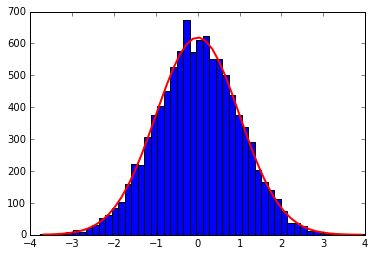

In [11]:
counts, bins, patches = plt.hist(x, bins=n_bins,normed=False)
plt.plot(bin_centers,prediction, c='r', lw=2)

In [12]:
np.sum(prediction), np.sum(counts)

(9998.8512101667056, 10000.0)

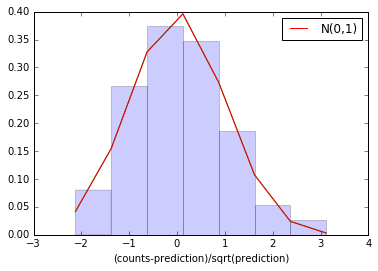

In [13]:
# make a quick plot of (counts-prediction)/sqrt(prediction)
# it should look like N(0,1) for chi-square formula to be appropriate
temp = plt.hist((counts-prediction)/np.sqrt(prediction), bins=7, normed=True, alpha=0.2)
plt.plot(temp[1], norm.pdf(temp[1]))
plt.plot(temp[1], norm.pdf(temp[1]), label='N(0,1)')
plt.legend()
plt.xlabel('(counts-prediction)/sqrt(prediction)')

## Chisquare

In [14]:
from scipy.stats import chisquare

In [15]:
from scipy.stats import chi2

In [16]:
# right way
np.sum((counts-prediction)**2/prediction)

51.183073455069298

In [17]:
# right way
chisq_obs, pvalue = chisquare(counts, prediction)
chisq_obs, pvalue

(51.183073455069298, 0.38801584444995618)

Now we can calculate the p-value for having a chi-square value this large.
Importantly we need to have the number of degrees of freedom be the number of bins.

In [18]:
#p-value
chi2.sf(chisq_obs,counts.size)

0.42701197069857377

## Note 
A p-value of 0 or 1 is very unlikely. You should expect to sit in the middle of the distribution and have a p-value of ~0.5

## Normalized Histogram (wrong way)

Here we make a normed histogram, which is equivalent to dividing by the normalization constant

In [19]:
prediction_normed = norm.pdf(bin_centers)

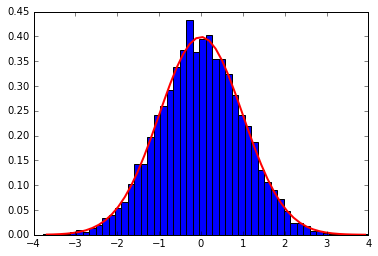

In [20]:
counts_normed, bins, patches = plt.hist(x, bins=n_bins,normed=True)
plt.plot(bin_centers,prediction_normed, c='r', lw=2)

In [21]:
# Note, they don't add up to 1., they add up to (roughly) 1/bin_width
np.sum(prediction_normed), np.sum(counts_normed)

(6.4443527840580872, 6.4450931898111961)

In [22]:
1/bin_width

6.4450931898111952

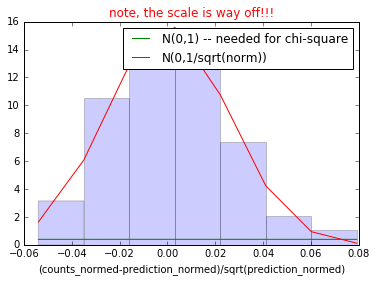

In [23]:
# make a quick plot of (counts-prediction)/sqrt(prediction)
# it should look like N(0,1) for chi-square formula to be appropriate
temp = plt.hist((counts_normed-prediction_normed)/np.sqrt(prediction_normed), bins=7, normed=True, alpha=0.2)
plt.plot(temp[1], norm.pdf(temp[1]), label='N(0,1) -- needed for chi-square')
plt.plot(temp[1], norm.pdf(temp[1], 0,1./np.sqrt(normalization)), label='N(0,1/sqrt(norm))')
plt.legend()
plt.xlabel('(counts_normed-prediction_normed)/sqrt(prediction_normed)')
plt.title('note, the scale is way off!!!', color='r')

In [24]:
#wrong way
np.sum((counts_normed-prediction_normed)**2/prediction_normed)

0.032987967815887143

In [25]:
#wrong way
chisq_obs_wrong, pvalue_wrong = chisquare(counts_normed, prediction_normed)
chisq_obs_wrong, pvalue_wrong

(0.032987967815887143, 1.0)

In [26]:
## compare with the right way
chisq_obs, pvalue

(51.183073455069298, 0.38801584444995618)

In [27]:
#p-value
chi2.sf(chisq_obs_wrong,counts.size)

1.0

## Note 
A p-value of 0 or 1 is very unlikely. You should expect to sit in the middle of the distribution and have a p-value of ~0.5